# LDA-SVM

In [7]:
#import libraries

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd


"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [8]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/zahra_14d_noise_1200.csv")
test_data = pd.read_csv("../TestData/neodata/zahra_14d_noise_100.csv")
vald_data=pd.read_csv("../ValidationData/neodata/zahra_14d_noise_1200.csv")
#Getting labels
labels_trn = train_data['target']
labels_vald = vald_data['target']
labels_tst = test_data['target']

#Getting the labels for the training data:
targets = train_data['target'].unique().tolist()



In [9]:
#standardization
import standardization as sd
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)        #The function makes sure the target is not a part of the transformation
vald = standardizer.transform(vald_data)
tst = standardizer.transform(test_data)





# LDA-Dimensionality reduction  

Preserving 99.24% of variance


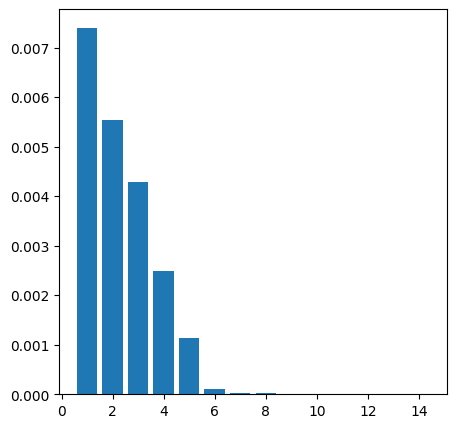

In [10]:
#Doing LDA transformation from 14 dimension to 5, by using a self implemented libary  (Have look at the egienvalue plot and saw it was fine)
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')


LDA_trn = lda.transform(trn)                    #The function makes sure the target is not a part of the projection
LDA_tst = lda.transform(tst)
LDA_vald = lda.transform(vald)

In [11]:
#Saves the eigenvalue plot
#plt.bar([x for x in range(1,11+1)],np.real(lda.eig_val[0:11]))
#plt.savefig("LDA-SVM_eigvalue.pdf", format="pdf", bbox_inches="tight")


# LDA-SVM training

In [12]:
#Training the SVM, on the 5 dimensional data, using sklearn
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)
clf_svm.fit(LDA_trn.drop('target',axis=1), labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

# LDA-SVM Confusion matrix for Validation data

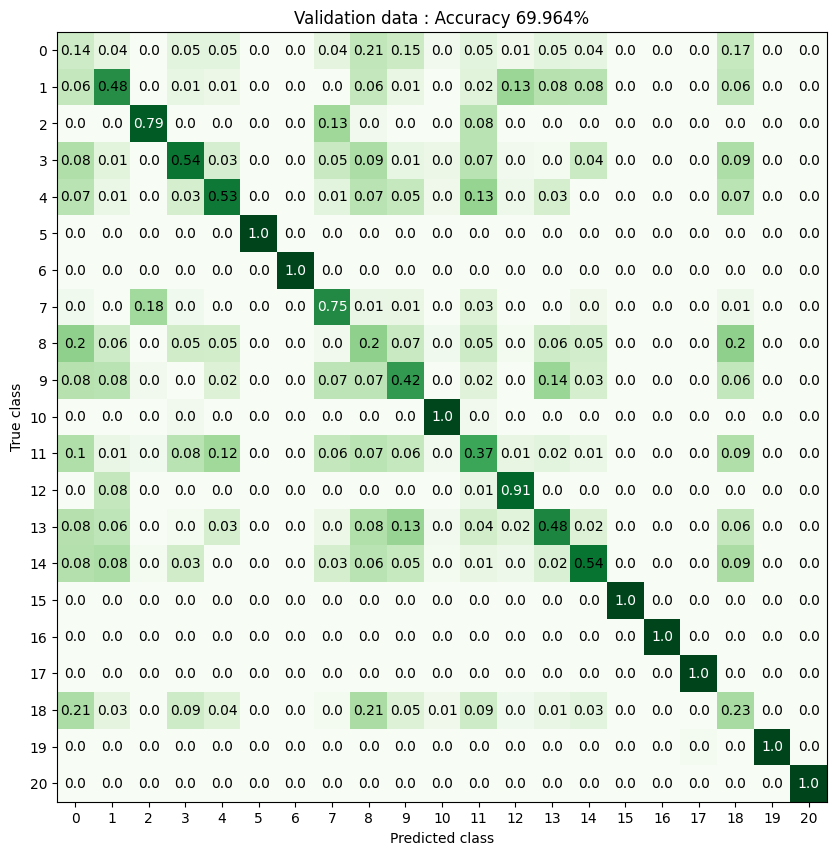

In [13]:

predict = clf_svm.predict(LDA_vald.drop('target',axis=1))

targets = vald_data['target'].unique().tolist()
numbers = targets
truth = labels_vald 

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='Validation data',save_fig_name='LDA-SVM 14d Validation confusion matrix.pdf',eval_labels = False)
pass

# LDA-SVM Confusion matrix for test data

In [14]:
#Prediction the classes for the testning data, for the SVM classifer trained on the training data.
predict_tst = clf_svm.predict(LDA_tst.drop('target',axis=1))
#Getting labels for testing data:


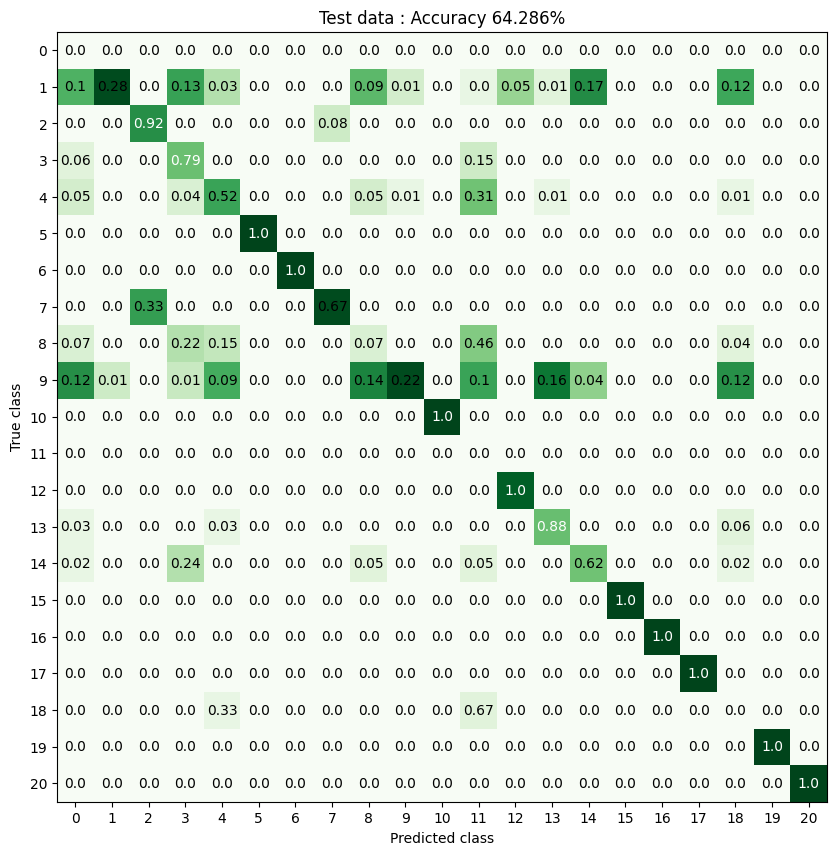

In [17]:

numbers=test_data['target'].unique().tolist()
#numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1
    
    
eval_labels = False
#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='Test data',save_fig_name='LDA-SVM 14d confusion matrix test.pdf',eval_labels = False)
pass

# LDA-LDA

In [30]:
print(LDA_vald)

              0         1         2         3         4  target
0     -0.007601 -0.031037  0.000360  0.037195 -0.012013     0.0
1     -0.007091 -0.013143  0.001320  0.021874 -0.009785     0.0
2     -0.026898 -0.008008 -0.010056  0.043542 -0.112248     0.0
3     -0.024465 -0.018929 -0.014111  0.036160 -0.004297     0.0
4      0.006765 -0.004967 -0.010305  0.004876 -0.035985     0.0
...         ...       ...       ...       ...       ...     ...
25195  0.235952  0.112531 -0.040637 -0.052788  0.139100    20.0
25196  0.376084  0.232903 -0.038158 -0.061470  0.335015    20.0
25197  0.280607  0.161944 -0.051850 -0.054102  0.176533    20.0
25198  0.286982  0.152257 -0.047152 -0.070242  0.186604    20.0
25199  0.389472  0.220190 -0.028266 -0.059798  0.389644    20.0

[25200 rows x 6 columns]


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()    
lda.fit(LDA_trn.drop('target',axis=1),labels_trn)                             #fitting to the training data

predict_vald = lda.predict(LDA_vald.drop('target',axis=1))                    #Making prediction on the validation data 


# LDA-LDA confusion matrix for validation data

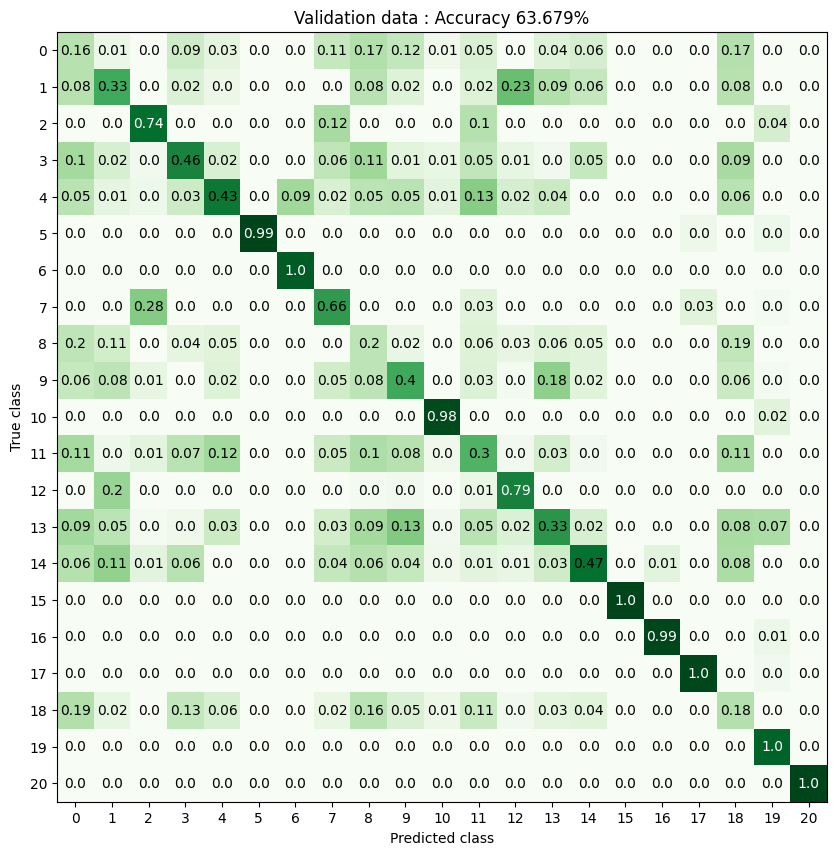

In [36]:

targets = vald_data['target'].unique().tolist()
numbers = targets
truth = labels_vald 

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_vald,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='Validation data',save_fig_name='LDA-LDA 14d Validation confusion matrix.pdf',eval_labels = False)
pass

# LDA-LDA confusion matrix for test data

In [37]:
#Prediction the classes for the testning data, for the SVM classifer trained on the training data.
predict_tst = clf_svm.predict(LDA_tst.drop('target',axis=1))


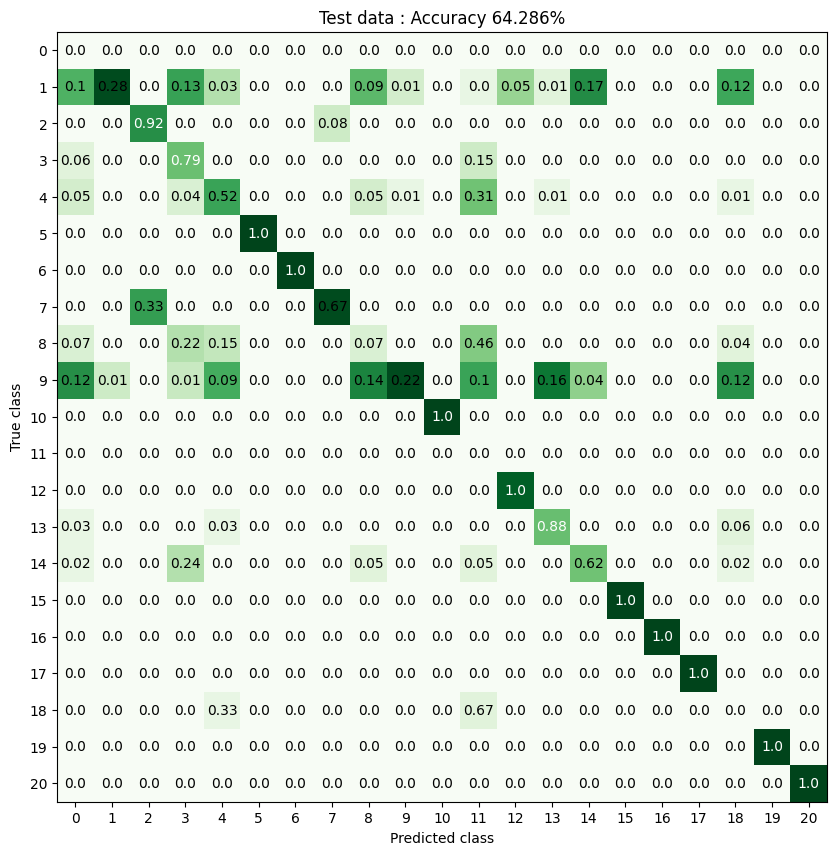

In [38]:
numbers=test_data['target'].unique().tolist()
#numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1
    
    
eval_labels = False
#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='Test data',save_fig_name='LDA-LDA 14d confusion matrix test.pdf',eval_labels = False)
pass